In [4]:
import numpy as np
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime as dt
import calendar as cal

init_notebook_mode(connected=True)
cf.go_offline()


from IPython.core.display import HTML

%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [117]:
df = pd.read_csv('https://s3.us-east-2.amazonaws.com/ads-demo1/E_Dataset.csv',parse_dates=['date'])

In [11]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [61]:
X = df.drop(['Appliances','date','rv1','rv2'],axis=1)
y = df['Appliances']

In [69]:
y = y.values

In [53]:
X

array([[ 30.        ,  19.89      ,  47.59666667, ...,   7.        ,
         63.        ,   5.3       ],
       [ 30.        ,  19.89      ,  46.69333333, ...,   6.66666667,
         59.16666667,   5.2       ],
       [ 30.        ,  19.89      ,  46.3       , ...,   6.33333333,
         55.33333333,   5.1       ],
       ..., 
       [ 10.        ,  25.5       ,  46.59666667, ...,   3.66666667,
         25.33333333,  13.26666667],
       [ 10.        ,  25.5       ,  46.99      , ...,   3.83333333,
         26.16666667,  13.23333333],
       [ 10.        ,  25.5       ,  46.6       , ...,   4.        ,
         27.        ,  13.2       ]])

In [50]:
y

array([ 60,  60,  50, ..., 270, 420, 430], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
coef= pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
lights,2.212974
T1,-0.457352
RH_1,14.297077
T2,-16.654417
RH_2,-12.746969
T3,24.306753
RH_3,4.867438
T4,-5.122656
RH_4,-0.185491
T5,-0.981677


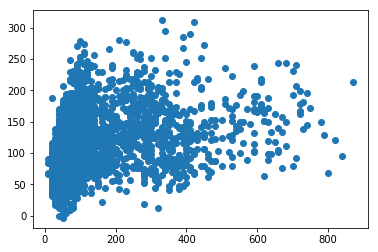

In [26]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [29]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=10, population_size=10,offspring_size=None, mutation_rate=0.9, verbosity=3)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
#tpot.export('tpot_pipeline.py')

C:\Users\Anuja\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning:

Falling back to the python version of hypervolume module. Expect this to be very slow.

C:\Users\Anuja\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

C:\Users\Anuja\Anaconda3\lib\importlib\_bootstrap_external.py:426: ImportWarning:

Not importing directory c:\users\anuja\anaconda3\lib\site-packages\mpl_toolkits: missing __init__



28 operators have been imported by TPOT.


A Jupyter Widget

Generation 1 - Current Pareto front scores:
-1	-5523.62944972031	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=1, ExtraTreesRegressor__min_samples_split=4, ExtraTreesRegressor__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False
Generation 2 - Current Pareto front scores:
-1	-5196.144133629206	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=1, ExtraTreesRegressor__min_samples_split=4, ExtraTreesRegressor__n_estimators=100)

Generation 3 - Current Pareto front scores:
-1	-5196.144133629206	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTrees

In [32]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [36]:
rf = RandomForestRegressor(n_jobs= -1, max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state= 1)

In [54]:
boruta_selector.fit(X,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	20
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	10 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	11 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	16 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	17 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	18 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	19 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	20 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	21 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	22 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	23 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	24 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	25 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	26 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	27 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	28 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	29 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	30 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	31 / 100
Confirmed: 	20
Tentative: 	4
Rejected: 	1


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	32 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	33 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	34 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	35 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	36 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	37 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	38 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	39 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	40 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	41 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	42 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	43 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	44 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	45 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	46 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	47 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	48 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	49 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	50 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	51 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	52 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	53 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	54 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	55 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	56 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	57 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	58 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	59 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	60 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	61 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	62 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	63 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	64 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	65 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	66 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	67 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	68 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	69 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	70 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	71 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	72 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	73 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	74 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	75 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	76 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	77 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	78 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	79 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	80 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	81 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	82 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	83 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	84 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	85 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	86 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	87 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	88 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	89 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	90 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	91 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	92 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	93 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	94 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	95 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	96 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	97 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	98 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


C:\Users\Anuja\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	99 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	2


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	20
Tentative: 	1
Rejected: 	2


BorutaPy(alpha=0.05,
     estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=-1,
           oob_score=False,
           random_state=<mtrand.RandomState object at 0x00000139C1FDE168>,
           verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x00000139C1FDE168>,
     two_step=True, verbose=2)

In [55]:
boruta_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False], dtype=bool)

In [56]:
boruta_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       6, 5])

In [59]:
import featuretools as ft

C:\Users\Anuja\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [118]:
df['date'] = pd.to_datetime(df['date'])

In [119]:
X_f = df.drop(['Appliances','rv1','rv2'],axis=1)
y_f = df[['date','Appliances']]

In [120]:
EntitySet = {"Appliances": (y_f, "date"), "rest": (X_f, "date")}

In [121]:
JoinedRelation = [("Appliances","date","rest","date")]

In [113]:
df_featuretools = df.groupby(['date']).mean()
df_featuretools = df_featuretools.reset_index()
df_featuretools['date'] = pd.to_datetime(df_featuretools['date'])

X_f = df_featuretools.drop(['Appliances','rv1','rv2'],axis=1)
y_f = df_featuretools[['date','Appliances']]

EntitySet = {"appliances": (y_f, "date"), "other": (X_f, "date")}
JoinedRelation = [("appliances","date","other","date")]

In [130]:
EntitySet

{'Appliances': (                     date  Appliances
  0     2016-01-11 17:00:00          60
  1     2016-01-11 17:10:00          60
  2     2016-01-11 17:20:00          50
  3     2016-01-11 17:30:00          50
  4     2016-01-11 17:40:00          60
  5     2016-01-11 17:50:00          50
  6     2016-01-11 18:00:00          60
  7     2016-01-11 18:10:00          60
  8     2016-01-11 18:20:00          60
  9     2016-01-11 18:30:00          70
  10    2016-01-11 18:40:00         230
  11    2016-01-11 18:50:00         580
  12    2016-01-11 19:00:00         430
  13    2016-01-11 19:10:00         250
  14    2016-01-11 19:20:00         100
  15    2016-01-11 19:30:00         100
  16    2016-01-11 19:40:00          90
  17    2016-01-11 19:50:00          70
  18    2016-01-11 20:00:00          80
  19    2016-01-11 20:10:00         140
  20    2016-01-11 20:20:00         120
  21    2016-01-11 20:30:00         190
  22    2016-01-11 20:40:00         110
  23    2016-01-11 20:50:0

In [ ]:
y_featuretools = phase_featuretools[['date','Appliances']]
X_featuretools = phase_featuretools.drop(['Appliances'],axis=1)
entities ={"appliances" :(y_featuretools,"date"),
          "rest" :(X_featuretools,"date")}
relationships = [("appliances","date","rest","date")]

In [122]:
features_matrix_app , feature_names = ft.dfs(entities = EntitySet, relationships= JoinedRelation, target_entity= "appliances")

KeyError: 'Entity appliances does not exist in dfs'

In [64]:
es = ft.EntitySet(id = 'date')

In [66]:
es = es.entity_from_dataframe(entity_id = 'date', dataframe = df, 
                              index = 'date')

In [74]:
newY = y.tolist

In [80]:
NewYdf = pd.DataFrame(np.array(newY).reshape(1,1), columns = list("a"))

In [81]:
features, feature_names = ft.dfs(entityset = es, target_entity= NewYdf, 
                                 max_depth = 2)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [ ]:
features.head()

In [123]:
from tsfresh import extract_features

C:\Users\Anuja\Anaconda3\lib\importlib\_bootstrap_external.py:426: ImportWarning:

Not importing directory c:\users\anuja\anaconda3\lib\site-packages\mpl_toolkits: missing __init__

C:\Users\Anuja\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

C:\Users\Anuja\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [125]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [126]:
X_tsfresh = df.drop('Appliances',axis=1)

In [127]:
from tsfresh.feature_extraction import MinimalFCParameters
extracted_features = extract_features(X_tsfresh, column_id="date",show_warnings=False,
                                      default_fc_parameters=MinimalFCParameters())

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [02:01<00:00, 11.00s/it]


In [129]:
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [ ]:

from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
from sklearn.linear_model import ElasticNetCV

regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X_train, y_train)

In [ ]:
regr.predict(X_train)

In [ ]:
regr.score(X_train, y_train)